### 1. Import Dependencies

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

### 2. Data Collection

In [3]:
df = pd.read_csv('winequality-red.csv')

In [7]:
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3. Data Analysis and Visualization

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/Users/samuelleung/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


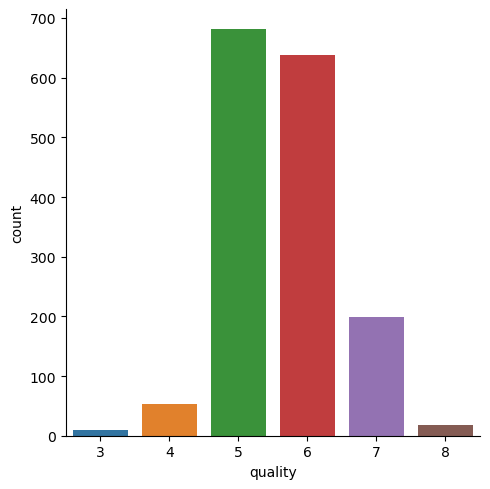

In [10]:
# Distribution of quality
sns.catplot(x='quality', data=df, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

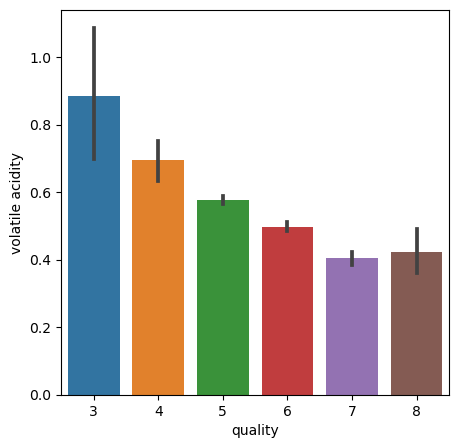

In [13]:
# Examine in relation to predictors
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

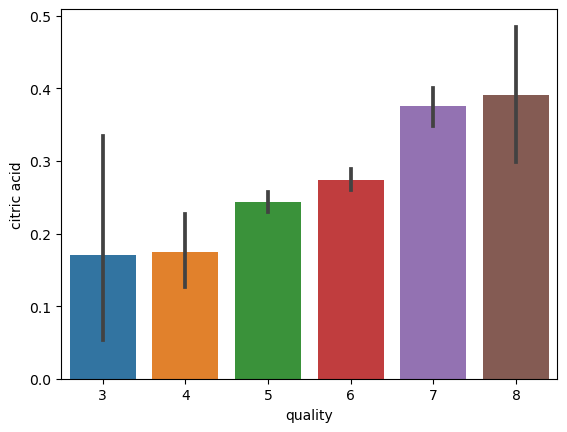

In [14]:
sns.barplot(x='quality', y='citric acid', data=df)

### Correlation

<Axes: >

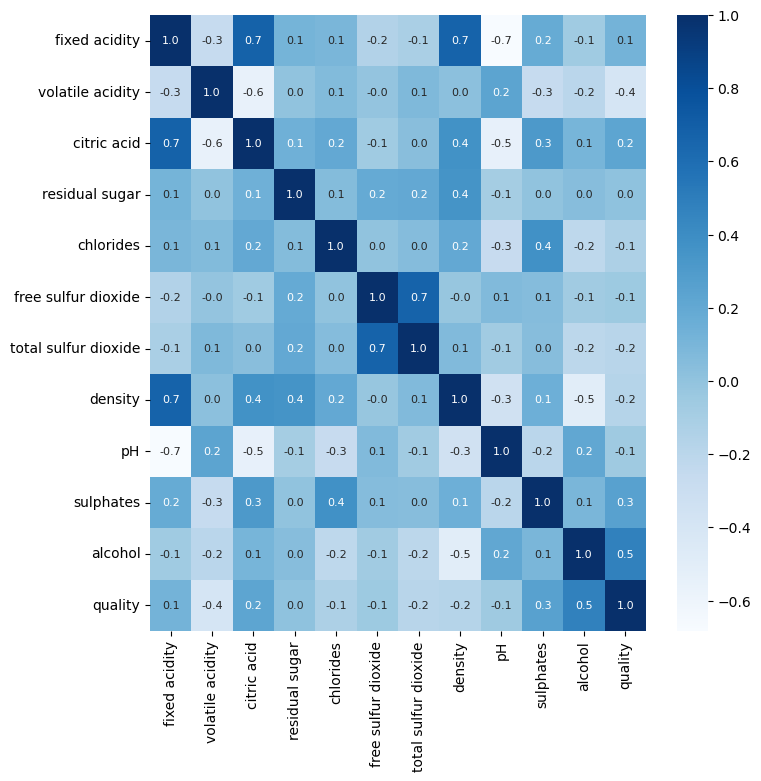

In [30]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### 4. Data Preprocessing

In [31]:
X = df.drop('quality', axis=1)

In [33]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [34]:
# Lateral binarization - wine quality >= 7 is good
y = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [41]:
print(y)
y.unique()

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


array([0, 1])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=27)

In [43]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1439, 11) (160, 11) (1439,) (160,)


### 5. Model Training

In [44]:
model = RandomForestClassifier()

In [45]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# Train Accuracy
train_preds = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print('Train Accuracy: ', train_accuracy)

# Test Accuracy
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print('Test Accuracy: ', test_accuracy)

Train Accuracy:  1.0
Test Accuracy:  0.94375


### 6. Make a Predictive system

In [93]:
# Random data from test
rand_i = random.randint(0,len(X_test))
test_data = X_test.iloc[rand_i]

# Convert to correct numpy format
test_arr = np.asarray(test_data)
test_arr = test_arr.reshape(1,-1)

prediction = model.predict(test_arr)
if prediction == 1:
    print("This wine is of Good quality")
else:
    print("This wine may be of Bad quality")

This wine is of Good quality


/Users/samuelleung/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [94]:
y_test.iloc[rand_i]

1